# 9.4. Redes neuronales recurrentes bidireccionales

En el aprendizaje secuencial, hasta ahora asumimos que nuestro objetivo es modelar el siguiente resultado dado lo que hemos visto hasta ahora, por ejemplo, en el contexto de una serie temporal o en el contexto de un modelo de lenguaje. Si bien este es un escenario típico, no es el único que podemos encontrar. Para ilustrar el problema, considere las siguientes tres tareas de llenar el espacio en blanco en una secuencia de texto:

yo ___soy

tengo ___hambre

Tengo ___hambre y puedo comer medio cerdo.

Dependiendo de la cantidad de información disponible, podemos llenar los espacios en blanco con palabras muy diferentes, como "feliz", "no" y "muy". Claramente, el final de la frase (si está disponible) transmite información importante sobre qué palabra elegir. Un modelo de secuencia que no sea capaz de aprovechar esto tendrá un desempeño deficiente en las tareas relacionadas. Por ejemplo, para hacerlo bien en el reconocimiento de entidades nombradas (p. ej., para reconocer si "Verde" se refiere a "Sr. Verde" o al color), el contexto de mayor alcance es igualmente vital. Para obtener algo de inspiración para abordar el problema, tomemos un desvío hacia los modelos gráficos probabilísticos.

## 9.4.1. Programación Dinámica en Modelos Ocultos de Markov

Esta subsección sirve para ilustrar el problema de programación dinámica. Los detalles técnicos específicos no son importantes para comprender los modelos de aprendizaje profundo, pero ayudan a motivar por qué se podría usar el aprendizaje profundo y por qué se podrían elegir arquitecturas específicas.

Si queremos resolver el problema utilizando modelos gráficos probabilísticos, podríamos, por ejemplo, diseñar un modelo de variable latente de la siguiente manera. En cualquier momento paso t
 , suponemos que existe alguna variable latente  ht
 que gobierna nuestra emisión observada xt
 a través de  P(xt∣ht)
 . Además, cualquier transición  ht→ht+1
 viene dada por alguna probabilidad de transición de estado  P(ht+1∣ht)
 . Este modelo gráfico probabilístico es entonces un modelo oculto de Markov como en la Fig. 9.4.1 .

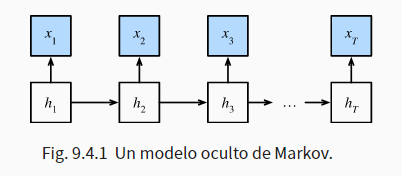

sí, para una secuencia de T
 observaciones tenemos la siguiente distribución de probabilidad conjunta sobre los estados observados y ocultos:

(9.4.1)


P(x1,…,xT,h1,…,hT)=∏t=1TP(ht∣ht−1)P(xt∣ht), where P(h1∣h0)=P(h1).

Ahora supongamos que observamos todos xi
 con la excepción de algunos  xj
 y nuestro objetivo es calcular P(xj∣x−j)
 , dónde x−j=(x1,…,xj−1,xj+1,…,xT)
 . Como no hay una variable latente en P(xj∣x−j)
 , consideramos sumar todas las posibles combinaciones de opciones para  h1,…,hT
 . en caso de que alguno hi
 puede asumir k
  valores distintos (un número finito de estados), esto significa que necesitamos sumar kT
 términos—generalmente ¡misión imposible! Afortunadamente, existe una solución elegante para esto: la programación dinámica .

Para ver cómo funciona, considere sumar las variables latentes  h1,…,hT
 Sucesivamente. De acuerdo con (9.4.1) , esto produce:

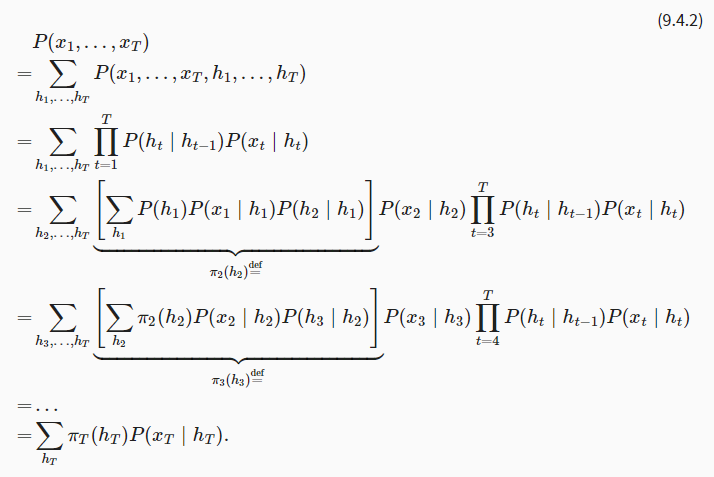

En general tenemos la recursividad directa como

(9.4.3)
πt+1(ht+1)=∑htπt(ht)P(xt∣ht)P(ht+1∣ht).
 
La recursividad se inicializa como π1(h1)=P(h1)
 . En términos abstractos esto se puede escribir como πt+1=f(πt,xt)
 , dónde  f
 es alguna función aprendible. ¡Esto se parece mucho a la ecuación de actualización en los modelos de variables latentes que discutimos hasta ahora en el contexto de RNN!

De manera completamente análoga a la recursividad hacia adelante, también podemos sumar sobre el mismo conjunto de variables latentes con una recursividad hacia atrás. Esto produce:

(9.4.4)


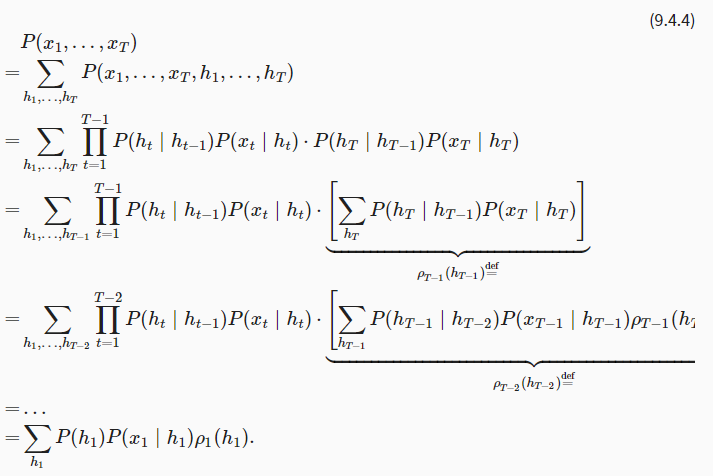

Por lo tanto, podemos escribir la recursión hacia atrás como

(9.4.5)

ρt−1(ht−1)=∑htP(ht∣ht−1)P(xt∣ht)ρt(ht),

con inicialización ρT(hT)=1
 . Tanto las recursiones hacia adelante como hacia atrás nos permiten sumar T
 variables latentes en  O(kT)
 tiempo (lineal) sobre todos los valores de  (h1,…,hT)
 en lugar de en tiempo exponencial. Este es uno de los grandes beneficios de la inferencia probabilística con modelos gráficos. También es una instancia muy especial de un algoritmo general de paso de mensajes [Aji & McEliece, 2000] . Combinando las recursiones hacia adelante y hacia atrás, podemos calcular

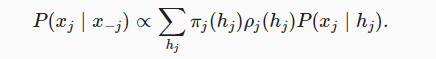

Tenga en cuenta que en términos abstractos, la recursión hacia atrás se puede escribir como  ρt−1=g(ρt,xt)
 , dónde g
 es una función aprendible. Nuevamente, esto se parece mucho a una ecuación de actualización, solo que se ejecuta hacia atrás a diferencia de lo que hemos visto hasta ahora en RNN. De hecho, los modelos ocultos de Markov se benefician de conocer datos futuros cuando están disponibles. Los científicos de procesamiento de señales distinguen entre los dos casos de conocer y no conocer las observaciones futuras como interpolación frente a extrapolación. Consulte el capítulo introductorio del libro sobre algoritmos secuenciales de Monte Carlo para obtener más detalles [Doucet et al., 2001] .

## 9.4.2. Modelo Bidireccional
Si queremos tener un mecanismo en RNN que ofrezca una capacidad de anticipación comparable a la de los modelos ocultos de Markov, debemos modificar el diseño de RNN que hemos visto hasta ahora. Afortunadamente, esto es fácil conceptualmente. En lugar de ejecutar un RNN solo en el modo de avance a partir del primer token, comenzamos otro desde el último token que se ejecuta de atrás hacia adelante. Los RNN bidireccionales agregan una capa oculta que pasa información hacia atrás para procesar dicha información de manera más flexible. La Fig. 9.4.2 ilustra la arquitectura de una RNN bidireccional con una sola capa oculta.

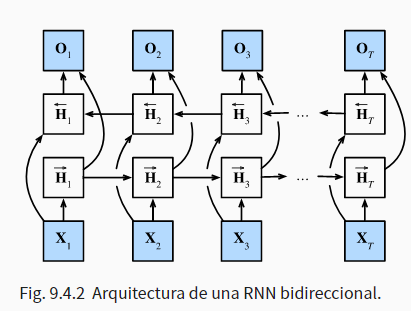

De hecho, esto no es muy diferente a las recurrencias hacia adelante y hacia atrás en la programación dinámica de modelos ocultos de Markov. La principal distinción es que en el caso anterior estas ecuaciones tenían un significado estadístico específico. Ahora están desprovistos de interpretaciones tan fácilmente accesibles y podemos tratarlos como funciones genéricas y aprendibles. Esta transición personifica muchos de los principios que guían el diseño de las redes profundas modernas: primero, use el tipo de dependencias funcionales de los modelos estadísticos clásicos y luego parametrícelos en una forma genérica.

### 9.4.2.1. Definición
Los RNN bidireccionales fueron introducidos por [Schuster & Paliwal, 1997] . Para una discusión detallada de las diversas arquitecturas, consulte también el artículo [Graves & Schmidhuber, 2005] . Veamos los detalles de tal red.

Para cualquier paso de tiempo t
 , dada una entrada de minilote  Xt∈Rn×d
 (número de ejemplos:  n
 , número de entradas en cada ejemplo: d
 ) y dejar que la función de activación de la capa oculta sea ϕ
 . En la arquitectura bidireccional, asumimos que los estados ocultos hacia adelante y hacia atrás para este paso de tiempo son  H→t∈Rn×h
 y  H←t∈Rn×h
 , respectivamente, donde h
 es el número de unidades ocultas. Las actualizaciones de estado ocultas hacia adelante y hacia atrás son las siguientes:

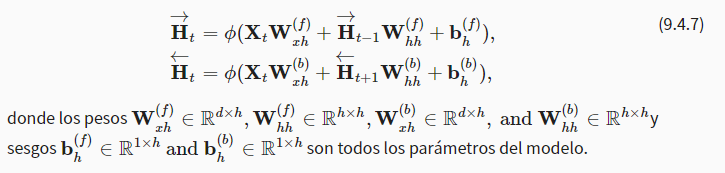

A continuación, concatenamos los estados ocultos hacia adelante y hacia atrás.  H→t
 y  H←t
 para obtener el estado oculto  Ht∈Rn×2h
 para ser alimentado en la capa de salida. En las RNN bidireccionales profundas con múltiples capas ocultas, dicha información se transmite como entrada a la siguiente capa bidireccional. Por último, la capa de salida calcula la salida  Ot∈Rn×q
 (número de salidas:  q
 ):

                                                                (9.4.8)
Ot=HtWhq+bq.
 
Aquí, la matriz de pesos  Whq∈R2h×q
 y el sesgo  bq∈R1×q
 son los parámetros del modelo de la capa de salida. De hecho, las dos direcciones pueden tener diferente número de unidades ocultas.

#### 9.4.2.2. Costo Computacional y Aplicaciones
Una de las características clave de una RNN bidireccional es que la información de ambos extremos de la secuencia se usa para estimar la salida. Es decir, usamos información de observaciones futuras y pasadas para predecir la actual. En el caso de la próxima predicción del token, esto no es exactamente lo que queremos. Después de todo, no podemos darnos el lujo de conocer el siguiente token al predecir el próximo. Por lo tanto, si usáramos un RNN bidireccional de forma ingenua, no obtendríamos una muy buena precisión: durante el entrenamiento tenemos datos pasados ​​y futuros para estimar el presente. Durante el tiempo de prueba, solo tenemos datos anteriores y, por lo tanto, poca precisión. Ilustraremos esto en un experimento a continuación.

Para colmo de males, los RNN bidireccionales también son extremadamente lentos. Las razones principales de esto son que la propagación hacia adelante requiere recurrencias tanto hacia adelante como hacia atrás en capas bidireccionales y que la propagación hacia atrás depende de los resultados de la propagación hacia adelante. Por lo tanto, los gradientes tendrán una cadena de dependencia muy larga.

En la práctica, las capas bidireccionales se usan con mucha moderación y solo para un conjunto limitado de aplicaciones, como completar palabras que faltan, anotar tokens (por ejemplo, para el reconocimiento de entidades nombradas) y codificar secuencias al por mayor como un paso en una canalización de procesamiento de secuencias (por ejemplo, para traducción automática). En la Sección 14.8 y la Sección 15.2 , presentaremos cómo usar RNN bidireccionales para codificar secuencias de texto.

## 9.4.3. Entrenamiento de un RNN bidireccional para una aplicación incorrecta
Si ignoráramos todos los consejos sobre el hecho de que las RNN bidireccionales usan datos pasados ​​y futuros y simplemente los aplicáramos a modelos de lenguaje, obtendremos estimaciones con una perplejidad aceptable. No obstante, la capacidad del modelo para predecir tokens futuros se ve gravemente comprometida, como ilustra el experimento a continuación. A pesar de la perplejidad razonable, solo genera galimatías incluso después de muchas iteraciones. Incluimos el código a continuación como un ejemplo de advertencia contra su uso en el contexto incorrecto.

In [5]:
use strict;
use warnings;
use Data::Dump qw(dump);
use AI::MXNet qw(mx);
use d2l;
use d2l::RNNModelScratch;
use d2l::RNNModel;
use d2l::Vocab;
use d2l::SeqDataLoader;
use d2l::Animator;
use d2l::Accumulator;
use d2l::Timer;
use AI::MXNet::Gluon qw(gluon);

IPerl->load_plugin('Chart::Plotly'); # Jupyter
use base("AI::MXNet::Gluon::Block");
#import Chart::Plotly 'show_plot'; # localmente

In [6]:

my ($batch_size, $num_steps) = (32, 35, d2l->try_gpu());
my ($train_iter, $vocab) = d2l->load_data_time_machine(batch_size      => $batch_size, 
                                                       num_steps       => $num_steps,
                                                       use_random_iter => 1);

CODE(0xbb1a430)Vocab=HASH(0xbad9040)

In [14]:
my ($vocab_size, $num_hiddens, $num_layers) =($vocab->len, 256, 2);
my  $bidirectional;
my $lstm_layer = rnn->LSTM($num_hiddens, $num_layers, $bidirectional=True);
my $model = RNNModel->new($lstm_layer, $vocab->len);

Error: Bareword "True" not allowed while "strict subs" in use at reply input line 3.



In [16]:
#Train the model
my $num_epochs = 500;
my $lr =1;
my $device = @_;
my $model = RNNModelScratch->new(($vocab)->len, $num_hiddens, $device, get_params, init_gru_state, gru);
d2l->train_ch8($model, $train_iter, $vocab, $lr, $num_epochs, $device);

Error: Bareword "get_params" not allowed while "strict subs" in use at reply input line 5.
Bareword "init_gru_state" not allowed while "strict subs" in use at reply input line 5.
Bareword "gru" not allowed while "strict subs" in use at reply input line 5.



El resultado es claramente insatisfactorio por las razones descritas anteriormente. Para obtener una discusión sobre usos más efectivos de RNN bidireccionales, consulte la aplicación de análisis de sentimiento en la Sección 15.2 .

## 9.4.4. Summary
In bidirectional RNNs, the hidden state for each time step is simultaneously determined by the data prior to and after the current time step.

Bidirectional RNNs bear a striking resemblance with the forward-backward algorithm in probabilistic graphical models.

Bidirectional RNNs are mostly useful for sequence encoding and the estimation of observations given bidirectional context.

Bidirectional RNNs are very costly to train due to long gradient chains.

## 9.4.4. Resumen
En RNN bidireccionales, el estado oculto para cada paso de tiempo se determina simultáneamente por los datos anteriores y posteriores al paso de tiempo actual.

Los RNN bidireccionales tienen un parecido sorprendente con el algoritmo de avance hacia atrás en los modelos gráficos probabilísticos.

Los RNN bidireccionales son principalmente útiles para la codificación de secuencias y la estimación de observaciones en un contexto bidireccional.

Los RNN bidireccionales son muy costosos de entrenar debido a las largas cadenas de gradientes.

## 9.4.5. Ejercicios
Si las diferentes direcciones usan un número diferente de unidades ocultas, ¿cómo será la forma de Ht
 ¿cambiar?

Diseñe un RNN bidireccional con múltiples capas ocultas.

La polisemia es común en los lenguajes naturales. Por ejemplo, la palabra "banco" tiene diferentes significados en los contextos "fui al banco para depositar efectivo" y "fui al banco para sentarme". ¿Cómo podemos diseñar un modelo de red neuronal tal que, dada una secuencia de contexto y una palabra, se devuelva una representación vectorial de la palabra en el contexto? ¿Qué tipo de arquitecturas neuronales se prefiere para manejar la polisemia?